# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.

-Capomulin and Ramicane demonstrated greater effectiveness in reducing tumor volumes compared to Infubinol and Ceftamin.

-The correlation coefficient of 0.84 between weight and average tumor volume indicates a strong relationship.

-The study showed an equal distribution of male and female mice; however, the presence of outliers suggests the need for further investigation into the treatments for unusual tumor growth
 

In [93]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
complete_data=pd.merge(study_results,mouse_metadata,how="left",on="Mouse ID")

# Display the data table for preview
complete_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [94]:
# Checking the number of mice.
mice_count=len(mouse_metadata.iloc[:,0])
mice_count

249

In [95]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate=complete_data[complete_data.duplicated(subset=["Mouse ID","Timepoint"])]["Mouse ID"].unique()
duplicate

array(['g989'], dtype=object)

In [96]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_data=complete_data[complete_data.duplicated(subset=["Mouse ID","Timepoint"])]
duplicate_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [97]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
complete_data_clean = complete_data[~complete_data["Mouse ID"].isin(duplicate)]
complete_data_clean.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [98]:
# Checking the number of mice in the clean DataFrame.
mice_count_clean=len(complete_data_clean["Mouse ID"].unique())
mice_count_clean

248

## Summary Statistics

In [99]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
g_regimen = complete_data.groupby("Drug Regimen")

Mean=g_regimen["Tumor Volume (mm3)"].mean()
Median=g_regimen["Tumor Volume (mm3)"].median()
variance=g_regimen["Tumor Volume (mm3)"].var()
standard_deviation=g_regimen["Tumor Volume (mm3)"].std()
SEM=g_regimen["Tumor Volume (mm3)"].sem()


statistic_summary=pd.DataFrame({"Mean Tumor Volume":Mean,
                                "Median Tumor Volume":Median,
                                "Tumor Volume Variance":variance,
                                "Tumor Volume Std. Dev.":standard_deviation,
                                "Tumor Volume Std. Err.":SEM,})
statistic_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [100]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
s_summary=complete_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean","median","var","std","sem"])
s_summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

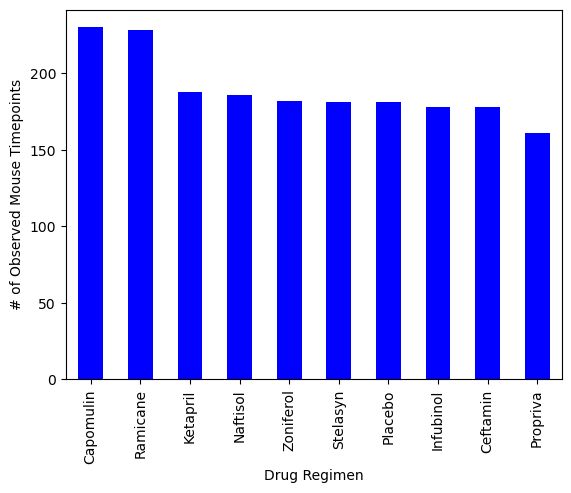

In [101]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
number_rows=complete_data["Drug Regimen"].value_counts()
number_rows.plot(kind="bar",color="blue")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

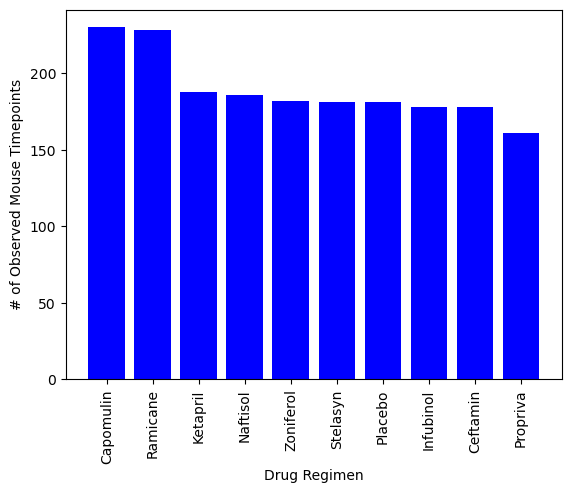

In [102]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(number_rows.index,number_rows.values,color="blue")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90)
plt.show()

<Axes: ylabel='count'>

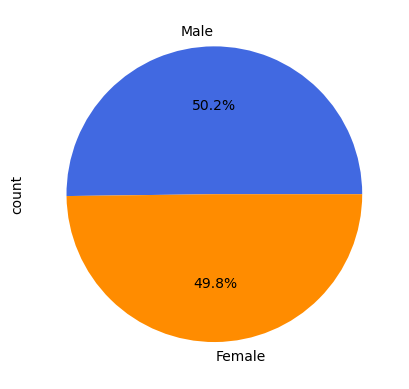

In [103]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
u_mice=complete_data.drop_duplicates(subset="Mouse ID")[["Sex",'Mouse ID']]
# Get the unique mice with their gender
v_count=u_mice["Sex"].value_counts()
# Make the pie chart
v_count.plot.pie(autopct='%1.1f%%',colors=["royalblue", "darkorange"],labels=v_count.index)


([<matplotlib.patches.Wedge at 0x1d1adb3ef90>,
 [Text(-0.0069391759767656585, 1.0999781124353174, 'Male'),
  Text(0.006939175976765524, -1.0999781124353174, 'Female')],
 [Text(-0.0037850050782358134, 0.5999880613283548, '50.2%'),
  Text(0.00378500507823574, -0.5999880613283548, '49.8%')])

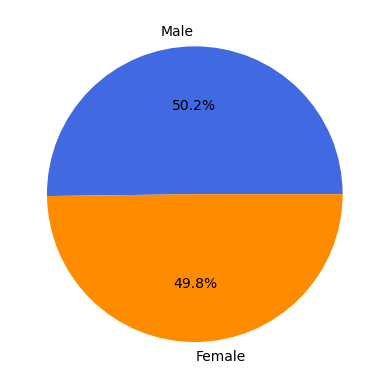

In [104]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
u_mice=complete_data.drop_duplicates(subset="Mouse ID")[["Sex",'Mouse ID']]
# Get the unique mice with their gender
v_count=u_mice["Sex"].value_counts()
# Make the pie chart
plt.pie(v_count,colors=["royalblue", "darkorange"],labels=["Male","Female"],autopct='%1.1f%%')

## Quartiles, Outliers and Boxplots

In [105]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
l_timepoint_df=complete_data.groupby("Mouse ID")["Timepoint"].max().reset_index()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df=pd.merge(l_timepoint_df,complete_data,on=['Mouse ID', 'Timepoint'], how='left')
# merged_df

In [106]:
# Put treatments into a list for for loop (and later for plot labels)
treatment=["Capomulin", "Ramicane", "Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in treatment:
    tumor_vols=merged_df.loc[merged_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)']

    # Locate the rows which contain mice on each drug and get the tumor volumes
    Q1 = tumor_vols.quantile(0.25)
    Q3 = tumor_vols.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # add subset
    tumor_vol_data.append(list(tumor_vols))


    # Determine outliers using upper and lower bounds
    outliers = tumor_vols[(tumor_vols < lower_bound) | (tumor_vols > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")
    

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


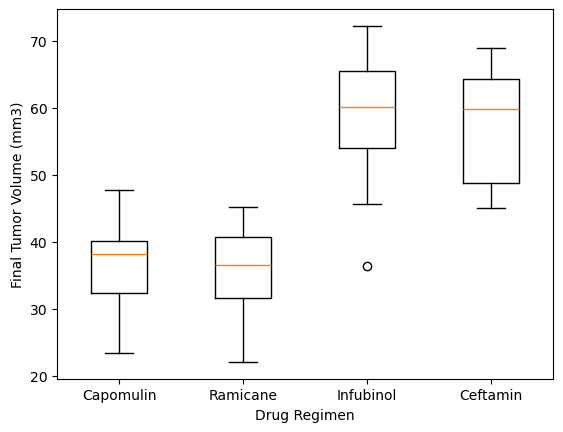

In [107]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data,labels=treatment)
plt.xlabel("Drug Regimen")
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

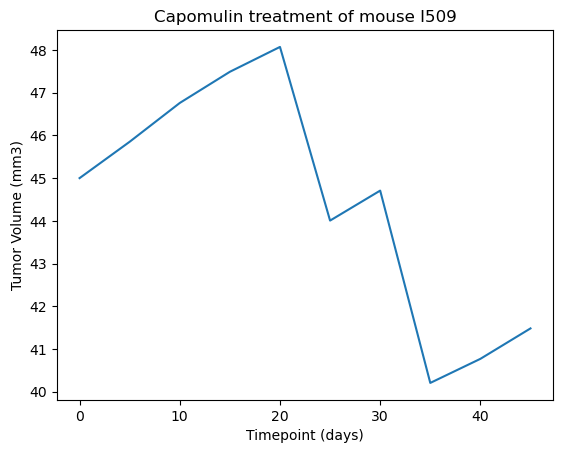

In [108]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data = complete_data[complete_data['Drug Regimen'] == "Capomulin"]
s_mouse_id = capomulin_data['Mouse ID'].iloc[6] 
mouse_data = capomulin_data[capomulin_data['Mouse ID'] == s_mouse_id]
plt.plot(mouse_data["Timepoint"],mouse_data["Tumor Volume (mm3)"])
plt.title("Capomulin treatment of mouse I509")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint (days)")
plt.show()

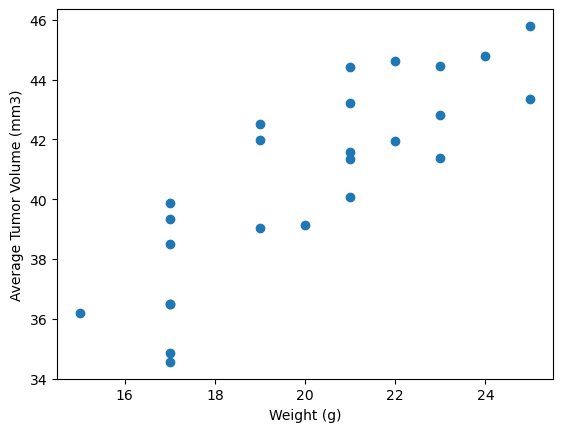

In [109]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
average_tumor_volume = capomulin_data.groupby('Mouse ID').mean(numeric_only=True)
plt.scatter(average_tumor_volume['Weight (g)'], average_tumor_volume['Tumor Volume (mm3)'])
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


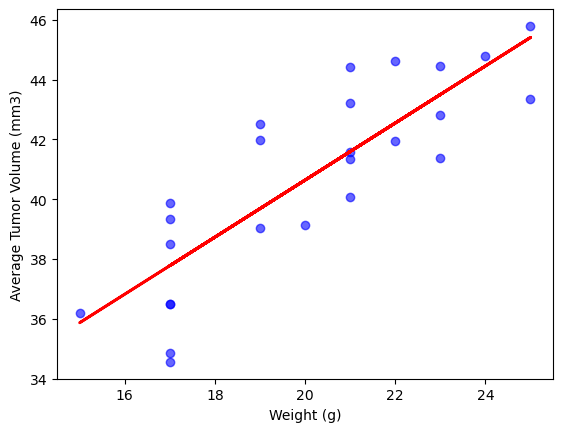

In [110]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
corr_coefficient = average_tumor_volume['Weight (g)'].corr(average_tumor_volume['Tumor Volume (mm3)'])
slope, intercept, r_value, p_value, std_err = st.linregress(average_tumor_volume['Weight (g)'], average_tumor_volume['Tumor Volume (mm3)'])
reg_line = slope * average_tumor_volume['Weight (g)'] + intercept
plt.scatter(average_tumor_volume['Weight (g)'], average_tumor_volume['Tumor Volume (mm3)'], color='blue', alpha=0.6)
plt.plot(average_tumor_volume['Weight (g)'], reg_line, color='red', linewidth=2)  # Plot the regression line
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
print(f"The correlation between mouse weight and the average tumor volume is {corr_coefficient:.2f}")
plt.show()
